# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import seaborn as sns
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from sklearn import preprocessing, ensemble, metrics, linear_model, model_selection, inspection, cluster
# import semopy
import datetime as dt
from scipy import interpolate
from tqdm import tqdm
from pprint import pprint
import json
from shapely.geometry import box, mapping
from functools import partial
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial
from affine import Affine
import pickle
import quantile_forest as qrf
import pingouin as pg
import jenkspy
import utils

import warnings
warnings.filterwarnings("ignore")

D:\dev\Anaconda3\envs\pygeo\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
plt.rc('font', family='Arial', size=12)
# plt.rcParams['axes.linewidth'] = 1
plt.rc('lines', linewidth=0.3)

# Functions

In [3]:
# var_category_dict = {
#     'Climate':       ['aridity', 'bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18','bio19'],
#     'Soil':          ['smp', 'cec_pred_0to30', 'clay_pred_0to30', 'nitrogen_pred_0to30', 'phh2o_pred_0to30', 'sand_pred_0to30', 'silt_pred_0to30', 'cec_pred_30to100', 'clay_pred_30to100', 'nitrogen_pred_30to100', 'phh2o_pred_30to100', 'sand_pred_30to100', 'silt_pred_30to100'],
#     'Topography':    ['elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi'],
#     # 'Vegetation':    ['evi'],
#     # 'Human':         ['pop']
# }

# color_category_dict = {
#     'Climate':       '#0080FF',
#     'Soil':          '#994C00',
#     'Topography':    '#FF0000',
#     # 'Vegetation':    'green',
#     # 'Human':         '#CC00CC'
# }

# var_category_dict = {
#     'Climate':       ['aridity', 'bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18','bio19'],
#     'Soil_physical': ['clay_pred_0to30', 'sand_pred_0to30', 'silt_pred_0to30', 'clay_pred_30to100', 'sand_pred_30to100', 'silt_pred_30to100'],
#     'Soil_chemical': ['cec_pred_0to30', 'nitrogen_pred_0to30', 'phh2o_pred_0to30', 'cec_pred_30to100', 'nitrogen_pred_30to100', 'phh2o_pred_30to100'],
#     'Topography':    ['elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi']
# }

##########################################################################################################################################################
var_category_dict = {
    'Climate':       ['aridity', 'bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18','bio19'],
    'Soil_physical': ['clay_0to30', 'sand_0to30', 'silt_0to30', 'clay_30to100', 'sand_30to100', 'silt_30to100'],
    'Soil_chemical': ['cec_0to30', 'cn_0to30', 'phh2o_0to30', 'cec_30to100', 'cn_30to100', 'phh2o_30to100'],
    'Topography':    ['elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi']
}

# color_category_dict = {
#     'Climate':       '#0080FF',
#     'Soil_physical': '#994C00',
#     'Soil_chemical': '#FF9933',
#     'Topography':    '#FF0000'
# }

color_category_dict = {
    'Climate':       '#0080FF',
    'Soil_physical': '#BA55D3', #'#FD7FFE'
    'Soil_chemical': '#FF7F02',
    'Topography':    '#00AA00'
}

# x_names_topsoil = [
#                    'elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
#                    # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
#                    'bio01', 'bio12',
#                    'cec_0to30', 'clay_0to30', 'nitrogen_0to30', 'ph_0to30', 'sand_0to30', 'silt_0to30',
#                    # 'smp',
#                    # 'evi',
#                    # 'pop'
#                   ]
# x_names_subsoil = [
#                    'elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
#                    # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
#                    'bio01', 'bio12',
#                    'cec_30to100', 'clay_30to100', 'nitrogen_30to100', 'ph_30to100', 'sand_30to100', 'silt_30to100',
#                    # 'smp',
#                    # 'evi',
#                    # 'pop'
#                   ]

x_names_topsoil = [
                   # 'elev',
                   'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
                   # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
                   'bio01', 'bio12',
                   'cec_0to30', 'clay_0to30', 'cn_0to30', 'phh2o_0to30', 'sand_0to30', 'silt_0to30',
                   # 'smp',
                   # 'evi',
                   # 'pop'
                  ]
x_names_subsoil = [
                   # 'elev',
                   'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
                   # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
                   'bio01', 'bio12',
                   'cec_30to100', 'clay_30to100', 'cn_30to100', 'phh2o_30to100', 'sand_30to100', 'silt_30to100',
                   # 'smp',
                   # 'evi',
                   # 'pop'
                  ]

# Soil and Topo
# var_category_dict = {
#     # 'Climate':       ['aridity', 'bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18','bio19'],
#     'Soil_physical': ['clay_0to30', 'sand_0to30', 'silt_0to30', 'clay_30to100', 'sand_30to100', 'silt_30to100'],
#     'Soil_chemical': ['cec_0to30', 'nitrogen_0to30', 'ph_0to30', 'cec_30to100', 'nitrogen_30to100', 'ph_30to100'],
#     'Topography':    ['elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi']
# }

# color_category_dict = {
#     # 'Climate':       '#0080FF',
#     'Soil_physical': '#994C00',
#     'Soil_chemical': '#FF9933',
#     'Topography':    '#FF0000'
# }

# x_names_topsoil = [
#                    'elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
#                    # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
#                    # 'bio01', 'bio12',
#                    'cec_0to30', 'clay_0to30', 'nitrogen_0to30', 'ph_0to30', 'sand_0to30', 'silt_0to30',
#                    # 'smp',
#                    # 'evi',
#                    # 'pop'
#                   ]
# x_names_subsoil = [
#                    'elev', 'slp', 'cti', 'tri', 'vrm', 'roughness', 'tpi', 'spi',
#                    # 'bio01', 'bio05', 'bio06', 'bio07', 'bio12', 'bio13', 'bio14', 'bio15',
#                    # 'bio01', 'bio12',
#                    'cec_30to100', 'clay_30to100', 'nitrogen_30to100', 'ph_30to100', 'sand_30to100', 'silt_30to100',
#                    # 'smp',
#                    # 'evi',
#                    # 'pop'
#                   ]

var_name_trans_dict = {
    'bio01': 'MAT',
    'bio12': 'MAP',
    'sand_0to30': 'SAND',
    'sand_30to100': 'SAND',
    'silt_0to30': 'SILT',
    'silt_30to100': 'SILT',
    'clay_0to30': 'CLAY',
    'clay_30to100': 'CLAY',
    'nitrogen_0to30': 'NITROGEN',
    'nitrogen_30to100': 'NITROGEN',
    'cn_0to30': 'C:N',
    'cn_30to100': 'C:N',
    'cec_0to30': 'CEC',
    'cec_30to100': 'CEC',
    'phh2o_0to30': 'pH',
    'phh2o_30to100': 'pH',
    'elev': 'ELEV',
    'roughness': 'ROUGH',
    'vrm': 'VRM',
    'tri': 'TRI',
    'cti': 'CTI',
    'slp': 'SLP',
    'spi': 'SPI',
    'tpi': 'TPI'
}

color_topsoil = '#DF9B76'
color_subsoil = '#5176B2'

In [4]:
def Q01(x):
    return x.quantile(0.01)

def Q025(x):
    return x.quantile(0.025)
    
def Q05(x):
    return x.quantile(0.05)

def Q10(x):
    return x.quantile(0.10)
    
def Q50(x):
    return x.quantile(0.50)

def Q90(x):
    return x.quantile(0.90)
    
def Q95(x):
    return x.quantile(0.95)

def Q975(x):
    return x.quantile(0.975)

def Q99(x):
    return x.quantile(0.99)

def extract_sample_values(df_samples, raster, x_name='lon', y_name='lat', method='nearest'):
    extracted_values = []
    xs_sample = xr.DataArray(np.array(df_samples[x_name]), dims='points')
    ys_sample = xr.DataArray(np.array(df_samples[y_name]), dims='points')
    extracted_values = raster.sel(x=xs_sample, y=ys_sample, method=method).data
    extracted_values = np.array(extracted_values).T
    return extracted_values
    
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def get_color_by_varname(var_name):
    color = 'black'
    for category in list(var_category_dict.keys()):
        if var_name in var_category_dict[category]:
            color = color_category_dict[category]
            break
    return color

def data_sampling(df, sample_size=100, group_name='biome_type_name', rand_seed=314):
    df_sampled = df.groupby(group_name, group_keys=False).apply(lambda x: x.sample(n=sample_size, random_state=rand_seed, replace=True)).reset_index(drop=True)
    # print(df_sampled.groupby('biome_type_name').agg({'profile_id': 'count'}).iloc[[5, 3, 0, 6, 4, 2, 7, 1]])
    return df_sampled

def data_sampling_by_weight(df, sample_size=100, weights_colname='sample_weight', rand_seed=314):
    df_sampled = df.sample(n=sample_size, weights=weights_colname, replace=True, random_state=rand_seed).reset_index(drop=True)
    # print(df_sampled.groupby('biome_type_name').agg({'profile_id': 'count'}).iloc[[5, 3, 0, 6, 4, 2, 7, 1]])
    return df_sampled

def get_category_importance(var_names, importances):
    df_category_importance = pd.DataFrame()
    category_list = []
    importance_list = []
    summary_list = []
    for category in list(var_category_dict.keys()):
        var_list = var_category_dict[category]
        importance_cate_list = []
        importance_category = 0.0
        for i in range(len(var_names)):
            if var_names[i] in var_list:
                importance_cate_list.append(importances[i])
        if len(importance_cate_list) > 0:
            # importance_category = np.mean(importance_cate_list)  # determing the category importance by using the mean of variable importances in each category
            importance_category = np.max(importance_cate_list)  # determing the category importance by using the max of variable importances in each category
            # importance_category = np.sum(importance_cate_list)  # determing the category importance by using the sum of variable importances in each category
            # importance_category = np.sum([v * v / np.sum(importance_cate_list) for v in importance_cate_list])  # determing the category importance by using the weighted averaged variable importances in each category (the weight is proportional to the importance)
        category_list.append(category)
        importance_list.append(importance_category)
    importance_list = [v / np.sum(importance_list) for v in importance_list]
    for i in range(len(list(var_category_dict.keys()))):
        category = list(var_category_dict.keys())[i]
        # summary_list.append('{} ({:.1f}%)'.format(category, importance_list[i]*100))
        summary_list.append('{:.1f}%'.format(importance_list[i]*100))
    df_category_importance['category'] = category_list
    df_category_importance['importance'] = importance_list
    df_category_importance['summary'] = summary_list
    return df_category_importance

def calc_feat_importance(x, y, model=None, method='permutation', cv=5, rand_seed=314):
    """
    method: 'normal' or 'permutation'
    """
    if model is None:
        model = ensemble.RandomForestRegressor(n_estimators=100, random_state=rand_seed)
    
    if method == 'normal':
        model.fit(x, y)
        # y_pred = model.predict(x)
        # r2 = metrics.r2_score(y, y_pred)
        # print('R2_score = {:.3f}'.format(r2))
        importances = model.feature_importances_
        sorted_id_list = np.argsort(importances)[::-1]
        sorted_x_names = [x_names[i] for i in sorted_id_list]
        sorted_importances = [np.round(importances[i], 3) for i in sorted_id_list]
    else:
        importances = []
        for cv_id in range(cv):
            x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.25, random_state=rand_seed)
            model.fit(x_train, y_train)
            r = inspection.permutation_importance(model, x_val, y_val, n_repeats=5, n_jobs=8, random_state=0)
            importances.append(list(r.importances_mean))
        importances = np.mean(importances, axis=0)
        sorted_id_list = np.argsort(importances)[::-1]
        sorted_x_names_ = [x_names[i] for i in sorted_id_list]
        sorted_importances_ = [np.round(importances[i], 3) for i in sorted_id_list]
        sorted_x_names = []
        sorted_importances = []
        for i in range(len(sorted_importances_)):
            if sorted_importances_[i] > 0:
                sorted_x_names.append(sorted_x_names_[i])
                sorted_importances.append(sorted_importances_[i])
    
    return sorted_x_names, sorted_importances

# Load data

In [5]:
def preprocess_df(df, top_or_sub='topsoil'):
    colnames = [col for col in list(df.columns) if 'N_fer' not in col]
    df = df[colnames]

    df['biome_type_name'].where(cond=df['biome_type_name'] != 'Deserts', other='Deserts and xeric shrublands', inplace=True)
    
    # Filter the samples in non-permafrost but have a very small NPP and BNPP values
    df = df[(df['npp_modis'] >= 0.01) | (df['is_permafrost'] == 'Permafrost')].reset_index(drop=True)
    if top_or_sub == 'topsoil':
        df = df[(df['bnpp_0to30'] >= 0.01) | (df['is_permafrost'] == 'Permafrost')].reset_index(drop=True)
    else:
        df = df[(df['bnpp_30to100'] >= 0.001) | (df['is_permafrost'] == 'Permafrost')].reset_index(drop=True)

    df['biome_type_name'] = df['biome_type_name'].astype('str')

    df['cn_0to30'].where(cond=(df['cn_0to30'] < 50) | (np.isnan(df['cn_0to30'])), other=50, inplace=True)
    df['cn_30to100'].where(cond=(df['cn_30to100'] < 50) | (np.isnan(df['cn_30to100'])), other=50, inplace=True)
    
    df['tovr'] = df['tovr_apparent']
    df['tovr_log'] = df['tovr_apparent_log']

    # df = df.rename(columns=var_name_trans_dict)
    
    return df

In [6]:
df_top = pd.read_csv('./results/df_samples_topsoil_with_covariates_v6.csv')
df_sub = pd.read_csv('./results/df_samples_subsoil_with_covariates_v6.csv')

df_top = preprocess_df(df=df_top, top_or_sub='topsoil')
df_sub = preprocess_df(df=df_sub, top_or_sub='subsoil')

for vname_ori in list(var_name_trans_dict.keys()):
    if '30to100' in vname_ori:
        continue
    vname_new = var_name_trans_dict[vname_ori]
    df_top[vname_new] = df_top[vname_ori]

for vname_ori in list(var_name_trans_dict.keys()):
    if '0to30' in vname_ori:
        continue
    vname_new = var_name_trans_dict[vname_ori]
    df_sub[vname_new] = df_sub[vname_ori]

df_top['CLAY+SILT'] = df_top['CLAY'] + df_top['SILT']
df_sub['CLAY+SILT'] = df_sub['CLAY'] + df_sub['SILT']
df_top['CLAY+SILT'].where(cond=(df_top['CLAY+SILT'] < 100) | (np.isnan(df_top['CLAY+SILT'])), other=100, inplace=True)
df_sub['CLAY+SILT'].where(cond=(df_sub['CLAY+SILT'] < 100) | (np.isnan(df_sub['CLAY+SILT'])), other=100, inplace=True)

df_top['MAT'] = df_top['MAT'] * 0.1
df_sub['MAT'] = df_sub['MAT'] * 0.1

print(df_top.shape)
print(list(df_top.columns))
print(np.mean(df_top['tovr']), np.median(df_top['tovr']))
print()
print(df_sub.shape)
print(list(df_sub.columns))
print(np.mean(df_sub['tovr']), np.median(df_sub['tovr']))

(95200, 154)
['profile_id', 'latitude', 'longitude', 'socs', 'UID', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'GID_2', 'NAME_2', 'GID_3', 'NAME_3', 'GID_4', 'NAME_4', 'IncomeGroup', 'biome_OpenLandMap', 'lc_id_modis', 'lc_name_modis', 'OBJECTID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'REALM', 'ECO_BIOME_', 'NNH', 'ECO_ID', 'SHAPE_LENG', 'SHAPE_AREA', 'NNH_NAME', 'COLOR', 'COLOR_BIO', 'COLOR_NNH', 'permafrost_CODE', 'permafrost_COMBO', 'permafrost_RELICT', 'permafrost_EXTENT', 'permafrost_CONTENT', 'permafrost_LANDFORM', 'is_permafrost', 'permafrost_EXTENT_id', 'crop_prop_maize', 'crop_prop_soybean', 'crop_prop_wheat_winter', 'crop_prop_wheat_spring', 'crop_prop_rice', 'crop_type_domain', 'crop_type_domain_id', 'crop_prop_sum', 'crop_prop_domain', 'biome_type', 'biome_type_name', 'harvest_index', 'frbnpp_0to30', 'frbnpp_30to100', 'geom_accuracy', 'dsds', 'country_name', 'npp_modis', 'rmf', 'agb', 'bgb', 'smp', 'bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09',

In [7]:
top_or_sub = 'topsoil'
# top_or_sub = 'subsoil'

if top_or_sub == 'topsoil':
    df = df_top
else:
    df = df_sub

# Random forest model derived feature importances

*** tovr_log ***
Global


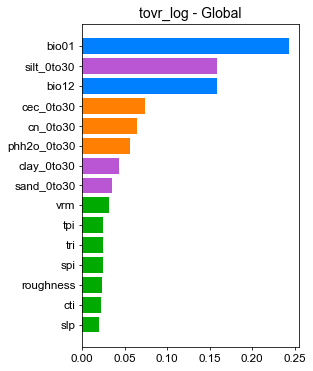

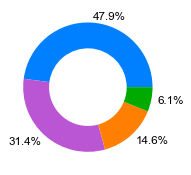


Tropical forests


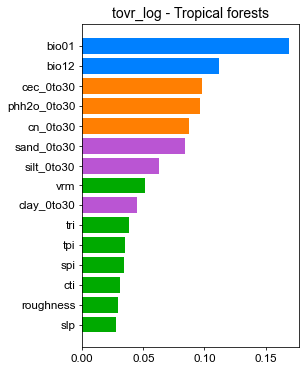

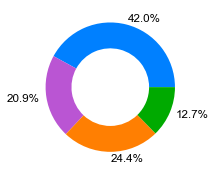


Temperate forests


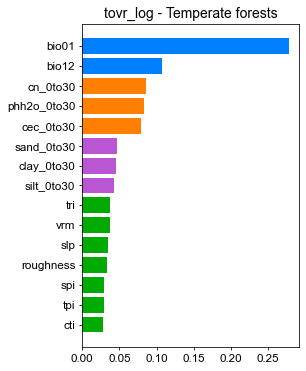

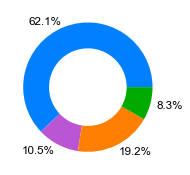


Boreal forests


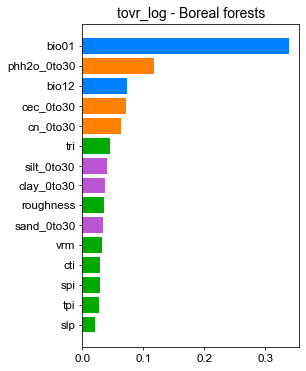

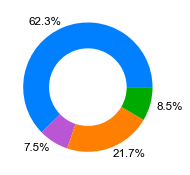


Tropical savannahs and grasslands


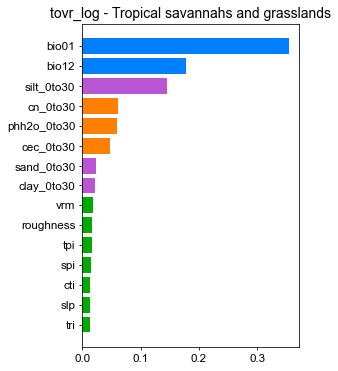

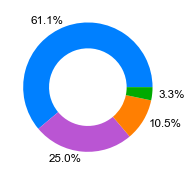


Temperate grasslands and shrublands


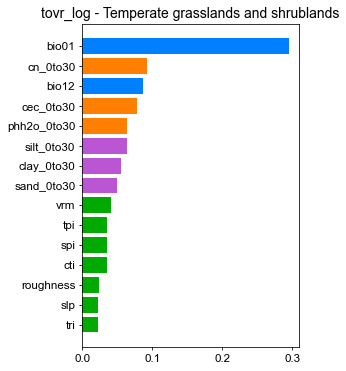

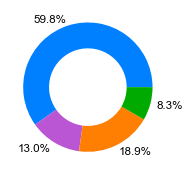


Deserts and xeric shrublands


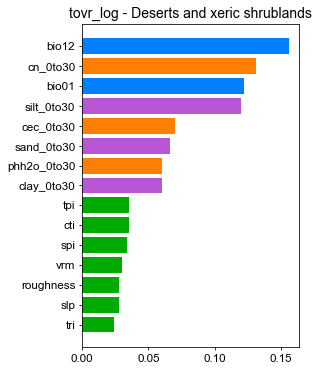

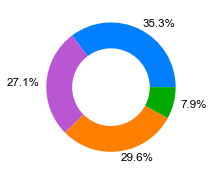


Tundra


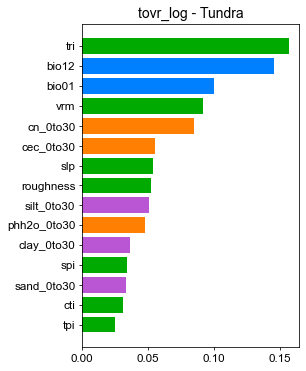

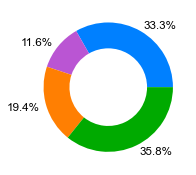


Croplands


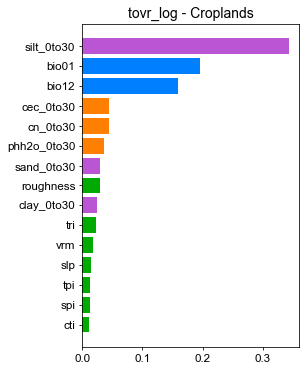

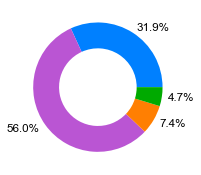


Wetlands


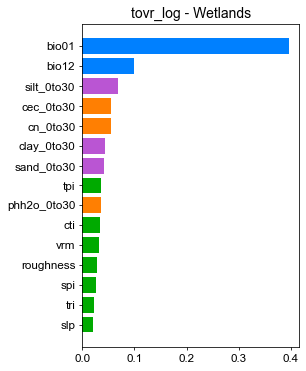

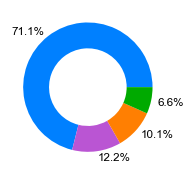


Non-permafrost


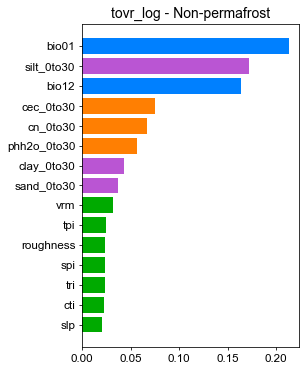

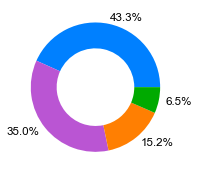


Permafrost


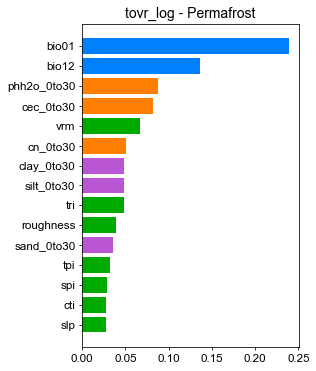

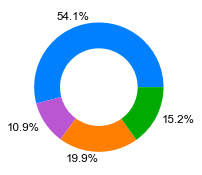


******



In [47]:
biome_name_list = [
    'Global',
    'Tropical forests', 'Temperate forests', 'Boreal forests', 'Tropical savannahs and grasslands', 'Temperate grasslands and shrublands', 'Deserts and xeric shrublands', 'Tundra', 'Croplands', 'Wetlands',
    'Non-permafrost', 'Permafrost'
]
biome_type_name_list = biome_name_list

# y_names = ['tovr']
y_names = ['tovr_log']

sample_size = 5000
rand_seed = 314

top_sub = 'topsoil'
# top_sub = 'subsoil'

if top_sub == 'topsoil':
    x_names = x_names_topsoil
else:
    x_names = x_names_subsoil

for y_name in y_names:
    print('*** {} ***'.format(y_name))
    for biome_type_name in biome_type_name_list:
        print(biome_type_name)
        if biome_type_name == 'Global':
            df_biome = df.reset_index(drop=True).copy()
            # df_biome = data_sampling_by_weight(df=df_biome, sample_size=sample_size, weights_colname='sample_weight', rand_seed=314)
        elif biome_type_name in ['Non-permafrost', 'Permafrost']:
            df_biome = df[df['is_permafrost'] == biome_type_name].reset_index(drop=True)
        else:
            df_biome = df[df['biome_type_name'] == biome_type_name].reset_index(drop=True)
        df_biome = df_biome[[y_name] + x_names + ['biome_type_name']].dropna().reset_index(drop=True)
        
        # df_biome = data_sampling(df=df_biome, sample_size=sample_size, group_name='biome_type_name', rand_seed=314)
        
        x = np.array(df_biome[x_names])
        y = np.array(df_biome[y_name])
        # print(x.shape, y.shape)
        
        np.random.seed(rand_seed)
        model = ensemble.RandomForestRegressor(n_estimators=100, random_state=rand_seed)
        
        # sorted_x_names, sorted_importances = calc_feat_importance(x=x, y=y, model=model, method='normal', rand_seed=rand_seed)
        sorted_x_names, sorted_importances = calc_feat_importance(x=x, y=y, model=model, method='permutation', cv=5, rand_seed=rand_seed)
        
        df_res_feat_importance = pd.DataFrame()
        df_res_feat_importance['varname'] = sorted_x_names
        df_res_feat_importance['importance'] = sorted_importances
        df_res_feat_importance.to_csv('./results/df_res_feat_importance_{}_{}_{}.csv'.format(y_name, top_sub, biome_type_name), index=False)
        
        plt.figure(figsize=(4, 6), dpi=70)
        colors = [get_color_by_varname(var_name=var_name) for var_name in sorted_x_names]
        plt.barh(sorted_x_names[::-1], sorted_importances[::-1], color=colors[::-1])
        plt.title('{} - {}'.format(y_name, biome_type_name))
        # plt.savefig('./figure/feature_importances_{}_{}.jpg'.format(y_name, biome_type_name), bbox_inches='tight', dpi=600)
        plt.show()
        
        df_category_importance = get_category_importance(var_names=sorted_x_names, importances=sorted_importances)
        plt.figure(figsize=(3, 3), dpi=70)
        # plt.pie(df_category_importance['importance'], labels=df_category_importance['summary'], normalize=True, wedgeprops={'width': 0.4}, colors=list(color_category_dict.values()))
        plt.pie(df_category_importance['importance'], labels=df_category_importance['summary'], wedgeprops={'width': 0.4}, colors=list(color_category_dict.values()))
        # plt.savefig('./figure/category_importances_{}_{}.jpg'.format(y_name, biome_type_name), bbox_inches='tight', dpi=600)
        plt.show()
        print()
    print('******\n')

In [42]:
var_name_trans_dict = {
    'bio01': 'MAT',
    'bio12': 'MAP',
    'sand_0to30': 'SAND',
    'sand_30to100': 'SAND',
    'silt_0to30': 'SILT',
    'silt_30to100': 'SILT',
    'clay_0to30': 'CLAY',
    'clay_30to100': 'CLAY',
    'nitrogen_0to30': 'NITROGEN',
    'nitrogen_30to100': 'NITROGEN',
    'cn_0to30': 'C:N',
    'cn_30to100': 'C:N',
    'cec_0to30': 'CEC',
    'cec_30to100': 'CEC',
    'phh2o_0to30': 'pH',
    'phh2o_30to100': 'pH',
    'ph_0to30': 'pH',
    'ph_30to100': 'pH',
    'elev': 'ELEV',
    'roughness': 'ROUGH',
    'vrm': 'VRM',
    'tri': 'TRI',
    'cti': 'CTI',
    'slp': 'SLP',
    'spi': 'SPI',
    'tpi': 'TPI'
}

Global


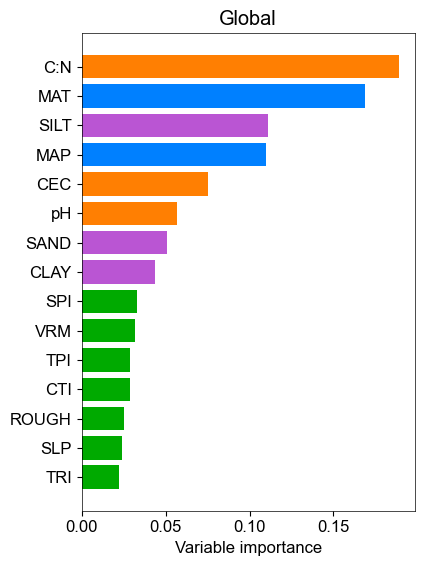

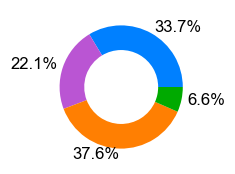

Tropical forests


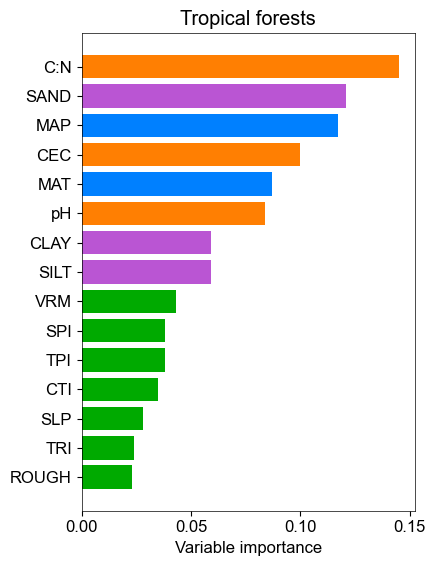

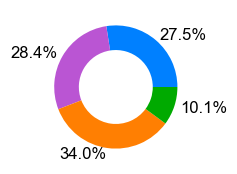

Temperate forests


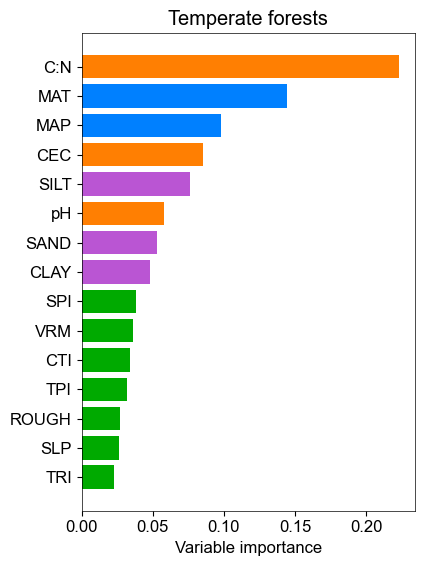

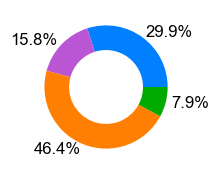

Boreal forests


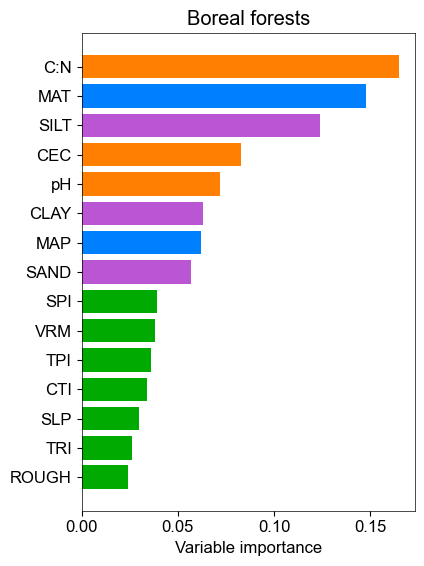

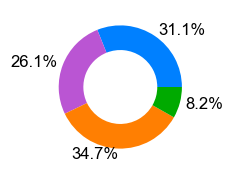

Tropical savannahs and grasslands


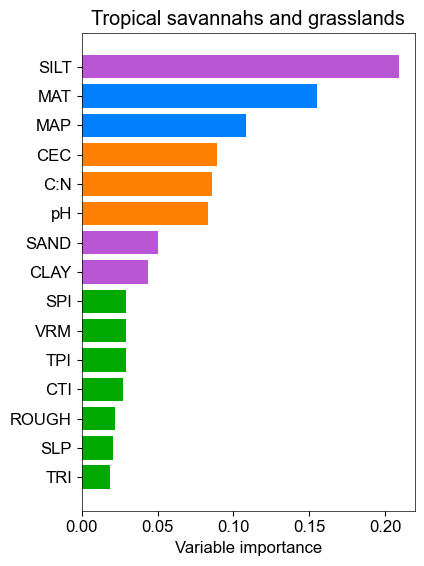

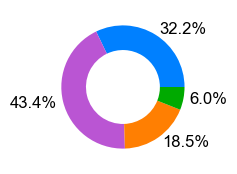

Temperate grasslands and shrublands


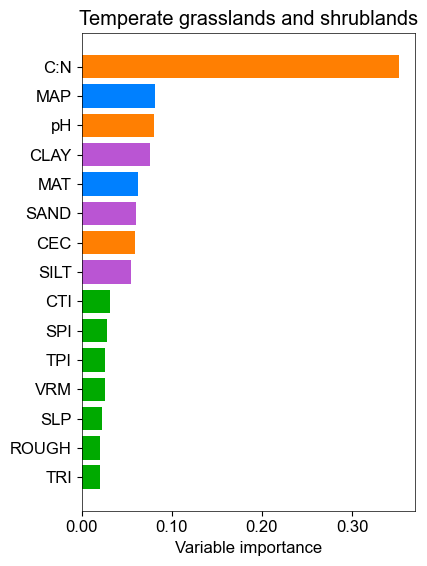

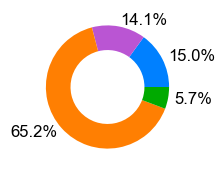

Deserts and xeric shrublands


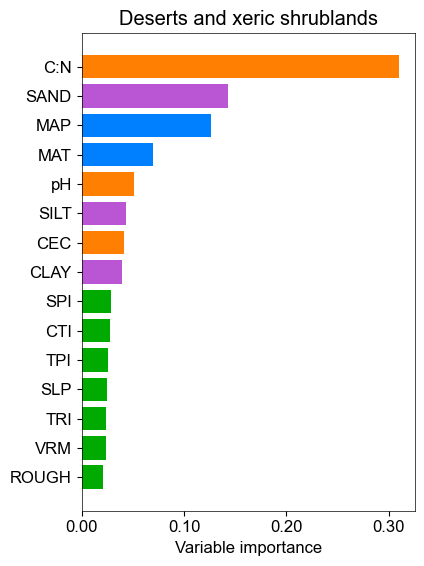

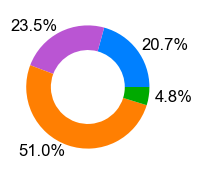

Tundra


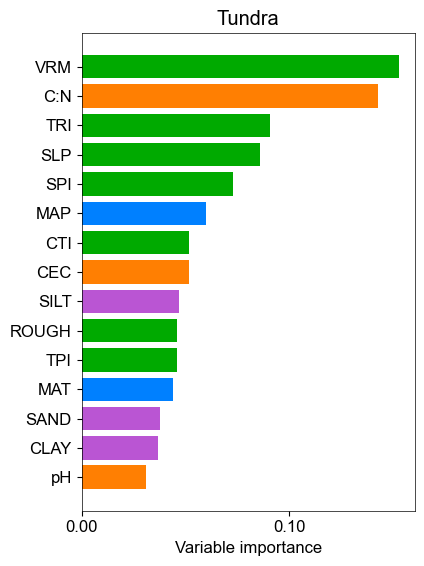

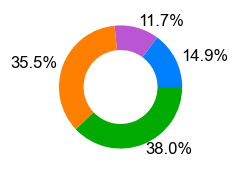

Croplands


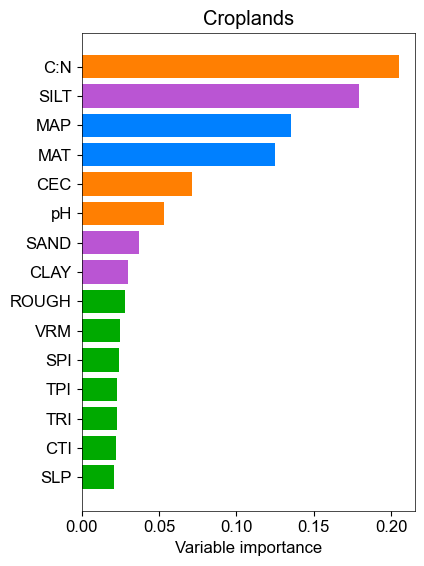

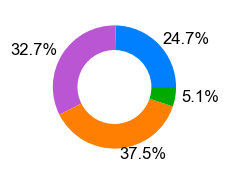

Wetlands


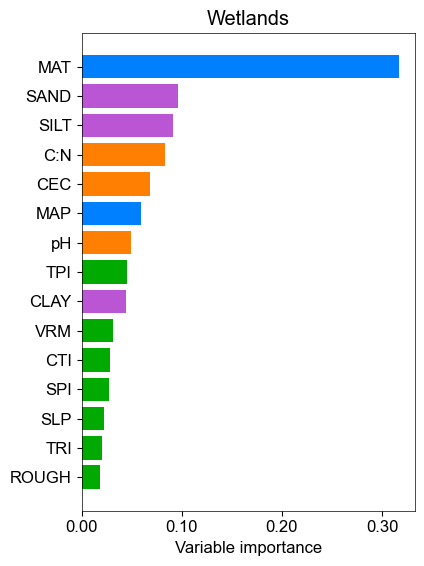

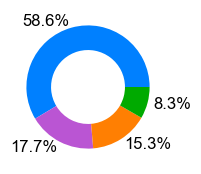

Non-permafrost


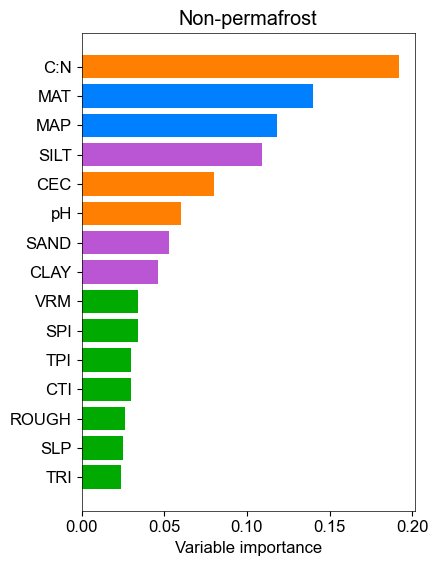

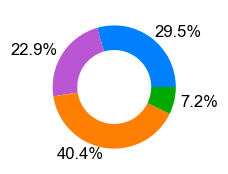

Permafrost


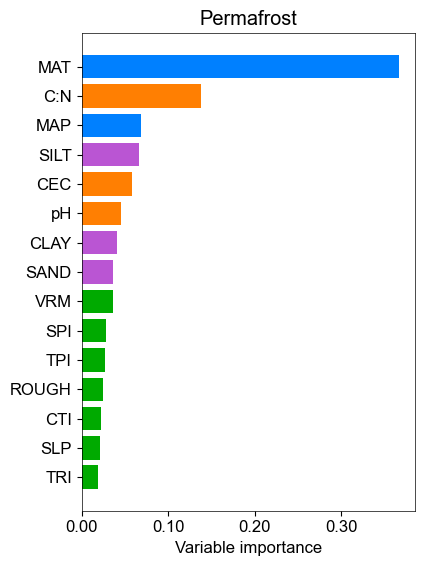

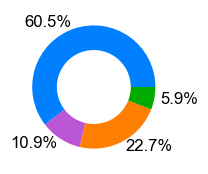

In [44]:
# Analysis at biome level
# layer = 'top'
layer = 'sub'
biome_name_list = [
    'Global',
    'Tropical forests', 'Temperate forests', 'Boreal forests', 'Tropical savannahs and grasslands', 'Temperate grasslands and shrublands', 'Deserts and xeric shrublands', 'Tundra', 'Croplands', 'Wetlands',
    'Non-permafrost', 'Permafrost'
]

for biome_name in biome_name_list:
    print(biome_name)
    df_feat_imp = pd.read_csv('./results/feature_importance/df_res_feat_importance_tovr_log_{}soil_{}.csv'.format(layer, biome_name))
    
    plt.figure(figsize=(4.3, 6.2), dpi=100)
    plt.rc('font', family='Arial', size=12)
    plt.rcParams['axes.linewidth'] = 0.5

    colors = [get_color_by_varname(var_name=var_name) for var_name in df_feat_imp['varname']]
    varname_list = [var_name_trans_dict[varname] for varname in df_feat_imp['varname'][::-1]]
    plt.barh(varname_list, df_feat_imp['importance'][::-1], color=colors[::-1])
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
    if biome_name in ['Tundra']:
        plt.xticks([0, 0.1])
        # plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
    plt.xlabel('Variable importance')
    plt.title(biome_name)
    plt.savefig('./figure/feature_importance/feature_importances_{}_{}.jpg'.format(layer, biome_name), bbox_inches='tight', dpi=600)
    plt.show()

    df_category_importance = get_category_importance(var_names=df_feat_imp['varname'], importances=df_feat_imp['importance'])
    plt.figure(figsize=(2, 2), dpi=100)
    # plt.pie(df_category_importance['importance'], labels=df_category_importance['summary'], normalize=True, wedgeprops={'width': 0.4}, colors=list(color_category_dict.values()))
    plt.pie(df_category_importance['importance'], labels=df_category_importance['summary'], wedgeprops={'width': 0.4}, colors=list(color_category_dict.values()))

    # plt.tight_layout()
    plt.savefig('./figure/feature_importance/category_importances_{}_{}.jpg'.format(layer, biome_name), bbox_inches='tight', dpi=600)
    plt.show()

# Partial corrections

In [9]:
biome_name_list = ['Global', 'Tropical forests', 'Temperate forests', 'Boreal forests', 'Tropical savannahs and grasslands', 'Temperate grasslands and shrublands', 'Deserts and xeric shrublands', 'Tundra', 'Croplands', 'Wetlands']

effect_var_list = ['MAT', 'MAP', 'CLAY+SILT', 'C:N', 'CEC', 'pH']

# additional_control_var_list = ['ELEV', 'VRM', 'SPI']
additional_control_var_list = ['ELEV', 'VRM', 'SPI', 'ECO_ID']

In [10]:
# generate a column of sample weight depending on sample size within each biome
def add_weight(df):
    weight_list = []
    for i in range(len(df)):
        weight = 0
        if df['biome_type_name'][i] == 'Tropical forests':
            weight = 2
        elif df['biome_type_name'][i] == 'Temperate forests':
            weight = 1
        elif df['biome_type_name'][i] == 'Boreal forests':
            weight = 4
        elif df['biome_type_name'][i] == 'Tropical savannahs and grasslands':
            weight = 2
        elif df['biome_type_name'][i] == 'Temperate grasslands and shrublands':
            weight = 2
        elif df['biome_type_name'][i] == 'Deserts and xeric shrublands':
            weight = 2
        elif df['biome_type_name'][i] == 'Tundra':
            weight = 8
        elif df['biome_type_name'][i] == 'Croplands':
            weight = 1
        elif df['biome_type_name'][i] == 'Wetlands':
            weight = 2
        else:
            weight = 0
        weight_list.append(weight)
    df['sample_weight'] = weight_list
    return df


df_top = add_weight(df=df_top)
df_sub = add_weight(df=df_sub)

In [40]:
# yname = 'tovr'
yname = 'tovr_log'

df_pc_res = pd.DataFrame()

for effect_var in effect_var_list:
    covar_list = [var for var in effect_var_list if var != effect_var]
    covar_list = covar_list + additional_control_var_list
    # if effect_var == 'CLAY+SILT':
    #     covar_list.remove('SAND')
    # if effect_var == 'SAND':
    #     covar_list.remove('CLAY+SILT')
    
    for biome_name in biome_name_list:
        if biome_name == 'Global':
            df_top_biome = df_top
            df_sub_biome = df_sub
            # df_top_biome = data_sampling(df=df_top_biome, sample_size=20000, group_name='biome_type_name', rand_seed=314)
            # df_sub_biome = data_sampling(df=df_sub_biome, sample_size=20000, group_name='biome_type_name', rand_seed=314)
            df_top_biome = data_sampling_by_weight(df=df_top_biome, sample_size=5000, weights_colname='sample_weight', rand_seed=314)
            df_sub_biome = data_sampling_by_weight(df=df_sub_biome, sample_size=5000, weights_colname='sample_weight', rand_seed=314)
        else:
            df_top_biome = df_top[df_top['biome_type_name'].isin([biome_name])].reset_index(drop=True)
            df_sub_biome = df_sub[df_sub['biome_type_name'].isin([biome_name])].reset_index(drop=True)

        # df_top_biome = df_top_biome[df_top_biome['MAP'] <= 4000].reset_index(drop=True)
        # df_sub_biome = df_sub_biome[df_sub_biome['MAP'] <= 4000].reset_index(drop=True)
        # df_top_biome[yname] = preprocessing.minmax_scale(df_top_biome[yname])
        # df_sub_biome[yname] = preprocessing.minmax_scale(df_sub_biome[yname])
        
        pc_res = pg.partial_corr(data=df_top_biome, x=effect_var, y=yname, covar=covar_list, method='pearson')
        pc_res['biome'] = biome_name
        pc_res['layer'] = 'Topsoil'
        pc_res['effect_var'] = effect_var
        df_pc_res = pd.concat([df_pc_res, pc_res], axis=0)

        pc_res = pg.partial_corr(data=df_sub_biome, x=effect_var, y=yname, covar=covar_list, method='pearson')
        pc_res['biome'] = biome_name
        pc_res['layer'] = 'Subsoil'
        pc_res['effect_var'] = effect_var
        df_pc_res = pd.concat([df_pc_res, pc_res], axis=0)

CI95_wide_list = []
for CI95_range in df_pc_res['CI95%']:
    CI95_wide = CI95_range[1] - CI95_range[0]
    CI95_wide_list.append(CI95_wide)
df_pc_res['CI95_wide'] = CI95_wide_list

CI95_lower_list = []
CI95_upper_list = []
for CI95_range in df_pc_res['CI95%']:
    CI95_lower = CI95_range[0]
    CI95_upper = CI95_range[1]
    CI95_lower_list.append(CI95_lower)
    CI95_upper_list.append(CI95_upper)
df_pc_res['CI95_lower'] = CI95_lower_list
df_pc_res['CI95_upper'] = CI95_upper_list

df_pc_res = df_pc_res.reset_index(drop=True)
df_pc_res.shape

(120, 10)

In [41]:
df_pc_res[df_pc_res['biome'] == 'Global']

,n,r,CI95%,p-val,biome,layer,effect_var,CI95_wide,CI95_lower,CI95_upper
0,4910,-0.152661,"[-0.18, -0.13]",6.074723e-27,Global,Topsoil,MAT,0.05,-0.18,-0.13
1,4902,-0.153937,"[-0.18, -0.13]",2.487669e-27,Global,Subsoil,MAT,0.05,-0.18,-0.13
20,4910,0.029679,"[0.0, 0.06]",3.773888e-02,Global,Topsoil,MAP,0.06,0.00,0.06
21,4902,0.041683,"[0.01, 0.07]",3.542842e-03,Global,Subsoil,MAP,0.06,0.01,0.07
40,4910,0.136614,"[0.11, 0.16]",7.499009e-22,Global,Topsoil,CLAY+SILT,0.05,0.11,0.16
41,4902,0.148238,"[0.12, 0.18]",1.921529e-25,Global,Subsoil,CLAY+SILT,0.06,0.12,0.18
60,4910,0.010547,"[-0.02, 0.04]",4.603950e-01,Global,Topsoil,C:N,0.06,-0.02,0.04
61,4902,0.369414,"[0.34, 0.39]",4.569865e-158,Global,Subsoil,C:N,0.05,0.34,0.39
80,4910,0.047914,"[0.02, 0.08]",7.926183e-04,Global,Topsoil,CEC,0.06,0.02,0.08
81,4902,0.089881,"[0.06, 0.12]",3.008907e-10,Global,Subsoil,CEC,0.06,0.06,0.12


In [26]:
# df_pc_res.to_csv('./results/df_pc_res_all_biomes.csv', index=False)

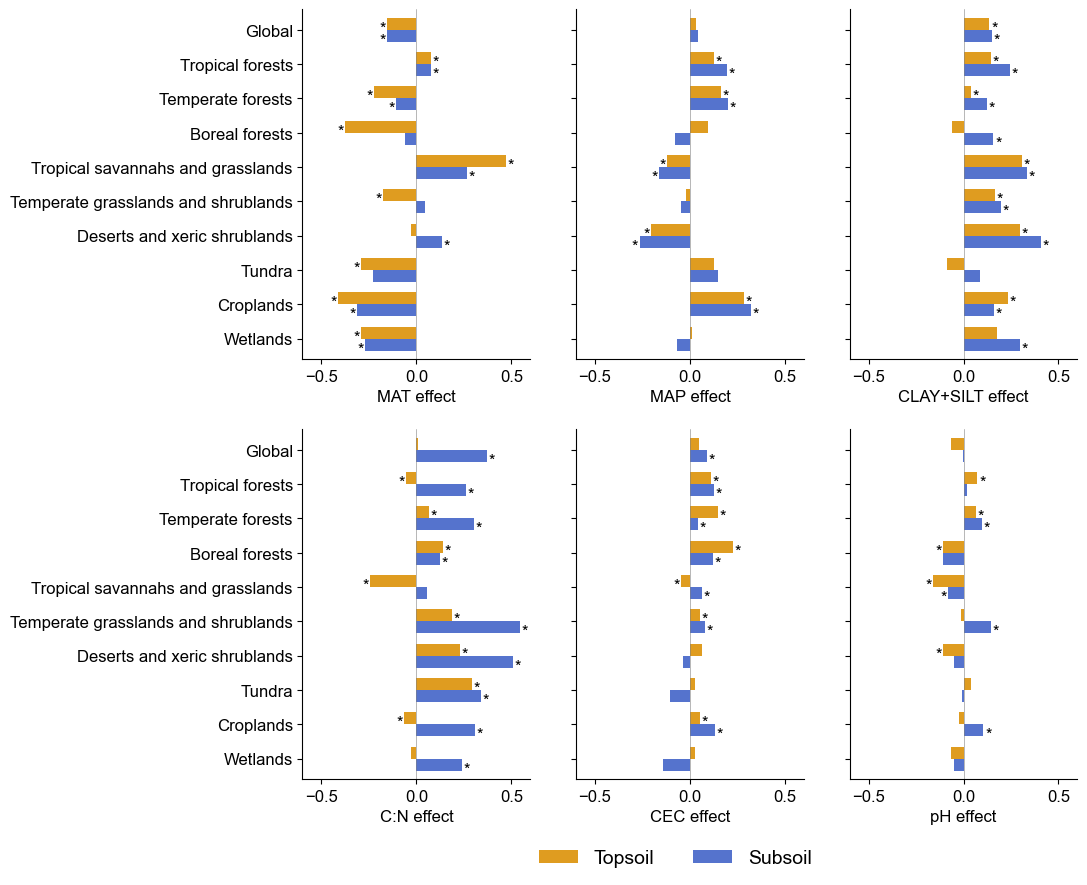

In [46]:
p_val_thred = 0.000001

plt.rc('font', family='Arial', size=12)
plt.rc('lines', linewidth=0.2)

plt.figure(figsize=(10, 10))
plt_id = 0
for effect_var in effect_var_list:
    plt_id += 1
    plt.subplot(2, 3, plt_id)
    
    df_subset = df_pc_res[df_pc_res['effect_var'] == effect_var].reset_index(drop=True)
    sns.barplot(x='r', y='biome', hue='layer', data=df_subset, width=0.7,
                orient='h', hue_order=['Topsoil', 'Subsoil'], palette=['orange', 'royalblue'])
    plt.plot([0, 0], [-0.6, 9.6], c='#808080', linewidth=0.4)
    
    # add p-value '*'
    for i in range(len(biome_name_list)):
        biome = biome_name_list[i]
        # topsoil
        df_subset_one = df_subset[(df_subset['biome'] == biome) & (df_subset['layer'] == 'Topsoil')].reset_index(drop=True)
        p_val = df_subset_one['p-val'][0]
        r_val = df_subset_one['r'][0]
        x_shift = r_val + 0.008 if r_val >= 0 else r_val - 0.04
        if p_val < p_val_thred:
            plt.text(x=x_shift, y=i+0.09, s='*')
        # subsoil
        df_subset_one = df_subset[(df_subset['biome'] == biome) & (df_subset['layer'] == 'Subsoil')].reset_index(drop=True)
        p_val = df_subset_one['p-val'][0]
        r_val = df_subset_one['r'][0]
        x_shift = r_val + 0.008 if r_val >= 0 else r_val - 0.04
        if p_val < p_val_thred:
            plt.text(x=x_shift, y=i+0.44, s='*')
    
    plt.legend([], [], frameon=False)
    plt.xlim(-0.6, 0.6)
    plt.ylim(9.6, -0.6)
    plt.xlabel('{} effect'.format(effect_var))
    plt.ylabel('')
    if plt_id not in [1, 4]:
        plt.gca().axes.yaxis.set_ticklabels([])
    # if plt_id in [1, 2, 3]:
    #     plt.gca().axes.xaxis.set_ticklabels([])
    if plt_id == 6:
        plt.legend(bbox_to_anchor=(-0.09, -0.15), frameon=False, ncol=2, fontsize=14)
        
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('./figure/partial_corr_biome_level_v2.jpg', bbox_inches='tight', dpi=600)
plt.show()

# Interactions between climatic and edaphic effects on tovr

In [15]:
interact_var_list = ['CLAY+SILT', 'C:N', 'CEC', 'pH']

In [33]:
biome = 'Global'
n_classes = 10

df_pc_res = pd.DataFrame()
for effect_var in ['MAT', 'MAP']:
    
    interact_var_dict = {
        'Global_MAT': ['MAP', 'CLAY+SILT', 'C:N', 'CEC', 'pH'],    
        'Global_MAP': ['MAT', 'CLAY+SILT', 'C:N', 'CEC', 'pH'],
    }
    interact_var_list = interact_var_dict['{}_{}'.format(biome, effect_var)]

    if biome == 'Global':
        df_top_biome = df_top
        df_sub_biome = df_sub
    else:
        df_top_biome = df_top[df_top['biome_type_name'].isin([biome])].reset_index(drop=True)
        df_sub_biome = df_sub[df_sub['biome_type_name'].isin([biome])].reset_index(drop=True)
    # if biome == 'Deserts':
    #     df_top_biome = df_top_biome[df_top_biome['MAP'] <= 400].reset_index(drop=True)
    #     df_sub_biome = df_sub_biome[df_sub_biome['MAP'] <= 400].reset_index(drop=True)

    # df_top_biome = df_top_biome[df_top_biome['MAP'] <= 5000].reset_index(drop=True)
    # df_sub_biome = df_sub_biome[df_sub_biome['MAP'] <= 5000].reset_index(drop=True)

    print('{}  {}  {}'.format(biome, effect_var, interact_var_list))
    
    interact_var_breaks_top_dict = {}
    interact_var_breaks_sub_dict = {}
    for interact_var in interact_var_list:
        values = list(df_top_biome[interact_var].dropna())    
        split_points = jenkspy.jenks_breaks(values, n_classes=n_classes)
        print('{}:'.format(interact_var))
        print(' | '.join(str(np.round(e, 1)) for e in split_points))
        print()
        interact_var_breaks_top_dict[interact_var] = split_points
    for interact_var in interact_var_list:
        values = list(df_sub_biome[interact_var].dropna())    
        split_points = jenkspy.jenks_breaks(values, n_classes=n_classes)
        print('{}:'.format(interact_var))
        print(' | '.join(str(np.round(e, 1)) for e in split_points))
        print()
        interact_var_breaks_sub_dict[interact_var] = split_points
    
    for interact_var in interact_var_list:
        # calculate correlation
        break_points_top = interact_var_breaks_top_dict[interact_var]
        break_points_sub = interact_var_breaks_sub_dict[interact_var]
        covar_list = [var for var in effect_var_list if var not in [effect_var, interact_var]]
        # covar_list = []
        for i in range(len(break_points_top)-1):
            df_top_cut = df_top_biome[(df_top_biome[interact_var] >= break_points_top[i]) & (df_top_biome[interact_var] <= break_points_top[i+1])].reset_index(drop=True)
            if len(df_top_cut) > 5:
                pc_res = pg.partial_corr(data=df_top_cut, x=effect_var, y='tovr_log', covar=covar_list, method='pearson')
                pc_res['error'] = pc_res['CI95%'][0][1] - pc_res['CI95%'][0][0]
                pc_res['layer'] = 'Topsoil'
                pc_res['effect_var'] = effect_var
                pc_res['interact_var'] = interact_var
                pc_res['interact_var_lower'] = break_points_top[i]
                pc_res['interact_var_upper'] = break_points_top[i+1]
                pc_res['interact_var_interval_idx'] = i+1
                pc_res['interact_var_value'] = (break_points_top[i] + break_points_top[i+1]) * 0.5
                # pc_res['interact_var_interval_level_name'] = level_name_dict[i]
                df_pc_res = pd.concat([df_pc_res, pc_res], axis=0)

            df_sub_cut = df_sub_biome[(df_sub_biome[interact_var] >= break_points_sub[i]) & (df_sub_biome[interact_var] <= break_points_sub[i+1])].reset_index(drop=True)
            if len(df_sub_cut) > 5:
                pc_res = pg.partial_corr(data=df_sub_cut, x=effect_var, y='tovr_log', covar=covar_list, method='pearson')
                pc_res['error'] = pc_res['CI95%'][0][1] - pc_res['CI95%'][0][0]
                pc_res['layer'] = 'Subsoil'
                pc_res['effect_var'] = effect_var
                pc_res['interact_var'] = interact_var
                pc_res['interact_var_lower'] = break_points_sub[i]
                pc_res['interact_var_upper'] = break_points_sub[i+1]
                pc_res['interact_var_interval_idx'] = i+1
                pc_res['interact_var_value'] = (break_points_sub[i] + break_points_sub[i+1]) * 0.5
                # pc_res['interact_var_interval_level_name'] = level_name_dict[i]
                df_pc_res = pd.concat([df_pc_res, pc_res], axis=0)
df_pc_res = df_pc_res.reset_index(drop=True)

CI95_lower_list = []
CI95_upper_list = []
for CI95_range in df_pc_res['CI95%']:
    CI95_lower = CI95_range[0]
    CI95_upper = CI95_range[1]
    CI95_lower_list.append(CI95_lower)
    CI95_upper_list.append(CI95_upper)
df_pc_res['CI95_lower'] = CI95_lower_list
df_pc_res['CI95_upper'] = CI95_upper_list

df_pc_res.to_csv('./results/df_partial_corr_interact_MAT_MAP_{}.csv'.format(n_classes), index=False)

Global  MAT  ['MAP', 'CLAY+SILT', 'C:N', 'CEC', 'pH']
MAP:
3.0 | 395.0 | 599.0 | 812.0 | 1021.0 | 1236.0 | 1514.0 | 1894.0 | 2415.0 | 3184.0 | 7129.0

CLAY+SILT:
1.5 | 17.7 | 28.0 | 37.3 | 46.2 | 54.7 | 63.0 | 71.3 | 80.1 | 89.3 | 99.7

C:N:
0.3 | 5.9 | 8.6 | 10.7 | 12.8 | 15.5 | 18.9 | 23.8 | 30.8 | 41.7 | 50.0

CEC:
0.6 | 9.1 | 13.2 | 17.0 | 20.4 | 24.0 | 28.5 | 34.6 | 43.3 | 58.2 | 92.4

pH:
3.2 | 4.6 | 5.1 | 5.4 | 5.8 | 6.2 | 6.6 | 7.0 | 7.5 | 8.0 | 10.4

MAP:
9.0 | 411.0 | 621.0 | 838.0 | 1046.0 | 1281.0 | 1643.0 | 2126.0 | 2775.0 | 3680.0 | 7129.0

CLAY+SILT:
2.0 | 19.8 | 32.2 | 42.5 | 51.8 | 60.5 | 69.0 | 77.5 | 86.2 | 95.1 | 100.0

C:N:
0.1 | 3.9 | 6.2 | 8.4 | 10.9 | 13.9 | 18.1 | 23.8 | 32.0 | 43.2 | 50.0

CEC:
0.1 | 8.7 | 13.2 | 17.6 | 21.7 | 25.9 | 31.0 | 38.2 | 48.8 | 67.8 | 125.7

pH:
3.8 | 5.6 | 6.1 | 6.6 | 7.1 | 7.6 | 8.2 | 8.8 | 9.4 | 10.1 | 12.0

Global  MAP  ['MAT', 'CLAY+SILT', 'C:N', 'CEC', 'pH']
MAT:
-20.0 | -2.0 | 3.7 | 7.7 | 11.0 | 13.9 | 16.4 | 19.0 | 21.8 | 24.

In [16]:
n_classes = 10
df_pc_res = pd.read_csv('./results/df_partial_corr_interact_MAT_MAP_{}.csv'.format(n_classes))
print(df_pc_res.shape)
print(list(df_pc_res.columns))

(200, 14)
['n', 'r', 'CI95%', 'p-val', 'error', 'layer', 'effect_var', 'interact_var', 'interact_var_lower', 'interact_var_upper', 'interact_var_interval_idx', 'interact_var_value', 'CI95_lower', 'CI95_upper']


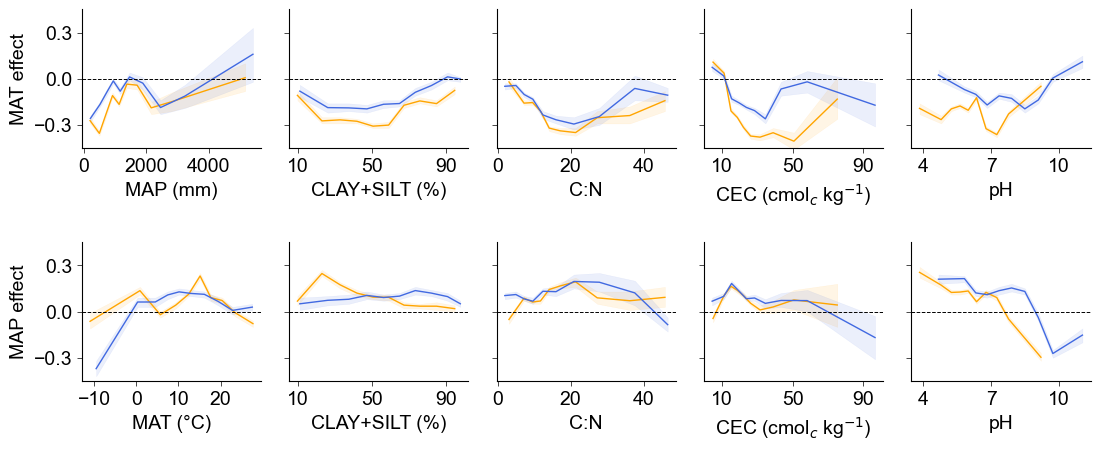

In [22]:
plt.rc('font', family='Arial', size=14)
plt.rc('lines', linewidth=0.5)

plt.figure(figsize=(11, 4.5))
plt_id = 0

interact_var_dict = {
    'MAT': ['MAP', 'CLAY+SILT', 'C:N', 'CEC', 'pH'],    
    'MAP': ['MAT', 'CLAY+SILT', 'C:N', 'CEC', 'pH']
}

var_show_name_dict = {
    'MAT': 'MAT (°C)',
    'MAP': 'MAP (mm)',
    'CLAY+SILT': 'CLAY+SILT (%)',
    'C:N': 'C:N',
    'CEC': 'CEC (cmol$_{c}$ kg$^{-1}$)',
    'pH': 'pH',
}

for effect_var in ['MAT', 'MAP']:
    interact_var_list = interact_var_dict[effect_var]
    for interact_var in interact_var_list:
        
        plt_id += 1
        plt.subplot(2, 5, plt_id)

        df_pc_res_ = df_pc_res[df_pc_res['effect_var'] == effect_var].reset_index(drop=True)
        df_pc_res_ = df_pc_res_[df_pc_res_['interact_var'] == interact_var].reset_index(drop=True)

        df_pc_res_top = df_pc_res_[df_pc_res_['layer'] == 'Topsoil'].reset_index(drop=True)
        df_pc_res_sub = df_pc_res_[df_pc_res_['layer'] == 'Subsoil'].reset_index(drop=True)

        plt.plot(df_pc_res_top['interact_var_value'], df_pc_res_top['r'], color='orange', linewidth=1, linestyle='-')
        plt.fill_between(x=df_pc_res_top['interact_var_value'], y1=df_pc_res_top['CI95_lower'], y2=df_pc_res_top['CI95_upper'], linewidth=0.3, alpha=0.1, color='orange')

        plt.plot(df_pc_res_sub['interact_var_value'], df_pc_res_sub['r'], color='royalblue', linewidth=1, linestyle='-')
        plt.fill_between(x=df_pc_res_sub['interact_var_value'], y1=df_pc_res_sub['CI95_lower'], y2=df_pc_res_sub['CI95_upper'], linewidth=0.3, alpha=0.1, color='royalblue')
        
        order = 2
        ci = 50
        n_boot = 100
        # sns.regplot(x='interact_var_value', y='r', data=df_pc_res_top, order=order, ci=None, color='orange', scatter_kws={'s': 0}, label='Topsoil')
        # sns.regplot(x='interact_var_value', y='r', data=df_pc_res_sub, order=order, ci=None, color='royalblue', scatter_kws={'s': 0}, label='Subsoil')

        # xmin = np.min(df_pc_res_['interact_var_value'])
        # xmax = np.max(df_pc_res_['interact_var_value'])
        xmin = plt.xlim()[0]
        xmax = plt.xlim()[1]
        plt.plot([xmin, xmax], [0, 0], c='black', linewidth=0.7, linestyle='--')

        plt.legend([], [], frameon=False)
        plt.xlabel(var_show_name_dict[interact_var])
        if plt_id in [1, 6]:
            plt.ylabel('{} effect'.format(effect_var))
        else:
            plt.ylabel('')

        plt.gca().tick_params(axis='x', width=0.5)
        plt.gca().tick_params(axis='y', width=0.5)
        plt.ylim(-0.45, 0.45)
        plt.yticks([-0.3, 0, 0.3])
        if plt_id not in [1, 6]:
            plt.yticks(ticks=[-0.3, 0, 0.3], labels=[])
            
        if plt_id in [1]:
            plt.xticks([0, 2000, 4000])
        elif plt_id in [6]:
            plt.xticks([-10, 0, 10, 20, 30])
        elif plt_id in [2, 7]:
            plt.xticks([10, 50, 90])
        elif plt_id in [3, 8]:
            plt.xticks([0, 20, 40])
        elif plt_id in [4, 9]:
            plt.xticks([10, 50, 90])
        elif plt_id in [5, 10]:
            plt.xticks([4, 7, 10])
        plt.xlim(xmin, xmax)
        
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        # plt.gca().yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

# plt.legend()
plt.subplots_adjust(hspace=1)
plt.tight_layout(pad=0.5, w_pad=1.2, h_pad=1.8)

plt.savefig('./figure/partial_corr_with_interact_global_MAT&MAP_connected_line.jpg', dpi=600)
plt.show()